## 设置GPU或CPU运行

如果是GPU版本，那么使用GPU运行，如果没有，则使用CPU运行

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")

## 导入数据

In [3]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import os,PIL,random,pathlib

# 设置随机种子尽可能使结果可以重现
import numpy as np
np.random.seed(1)

# 设置随机种子尽可能使结果可以重现
import tensorflow as tf
tf.random.set_seed(1)

In [4]:
data_dir = "./captcha"
# data_dir = "."
# data_dir = "/Users/de/code-set/2023-buy/captcha-predict/train/captcha"
data_dir = pathlib.Path(data_dir)
print(data_dir)
all_image_paths = list(data_dir.glob('*'))
print(all_image_paths)
all_image_paths = [str(path) for path in all_image_paths]
print(all_image_paths)
# 打乱数据
random.shuffle(all_image_paths)

# 获取数据标签
all_label_names = [path.split("/")[1].split(".")[0] for path in all_image_paths]

image_count = len(all_image_paths)
print("图片总数为：",image_count)

captcha
[PosixPath('captcha/p5g5m.png'), PosixPath('captcha/e72cd.png'), PosixPath('captcha/pgmn2.png'), PosixPath('captcha/6cm6m.png'), PosixPath('captcha/68wfd.png'), PosixPath('captcha/byc82.png'), PosixPath('captcha/gcx6f.png'), PosixPath('captcha/d8dce.png'), PosixPath('captcha/gd4mf.png'), PosixPath('captcha/fy2nd.png'), PosixPath('captcha/37ep6.png'), PosixPath('captcha/4nnf3.png'), PosixPath('captcha/ygenn.png'), PosixPath('captcha/c4527.png'), PosixPath('captcha/x37bf.png'), PosixPath('captcha/mx8bb.png'), PosixPath('captcha/ncfgb.png'), PosixPath('captcha/ewnx8.png'), PosixPath('captcha/2nx38.png'), PosixPath('captcha/wmpmp.png'), PosixPath('captcha/pyf65.png'), PosixPath('captcha/nxxf8.png'), PosixPath('captcha/ny5dp.png'), PosixPath('captcha/dgcm4.jpg'), PosixPath('captcha/cfp86.png'), PosixPath('captcha/2xc2n.png'), PosixPath('captcha/378e5.png'), PosixPath('captcha/d22y5.png'), PosixPath('captcha/w4nfx.png'), PosixPath('captcha/7mgmf.png'), PosixPath('captcha/25p2m.png'),

## 3.数据可视化

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

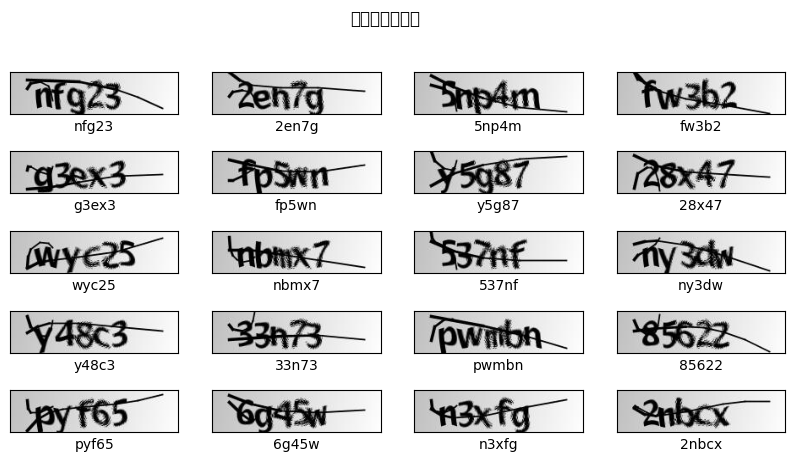

In [5]:
plt.figure(figsize=(10,5))
plt.suptitle("验证码原始数据")

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # 显示图片
    images = plt.imread(all_image_paths[i])
    plt.imshow(images)
    # 显示标签
    plt.xlabel(all_label_names[i])

plt.show()

## 标签数字化

In [6]:
number   = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
char_set       = number + alphabet
char_set_len   = len(char_set)
label_name_len = len(all_label_names[0])


# 将字符串数字化
def text2vec(text):
    vector = np.zeros([label_name_len, char_set_len])
    for i, c in enumerate(text):
        idx = char_set.index(c)
        vector[i][idx] = 1.0
    return vector


all_labels = [text2vec(i) for i in all_label_names]


In [7]:
vector = np.zeros([label_name_len, char_set_len])
for i,c in enumerate("6dmx7"):
    idx = char_set.index(c)
    vector[i][idx] = 1.0
    print(idx)
vector
    
    

6
13
22
33
7


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

## 预处理函数-构建一个tf.data.Dataset

In [8]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [50, 200])
    return image/255.0

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

## 加载数据

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

path_ds  = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(all_labels)

image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))


In [10]:
train_ds = image_label_ds.take(1000)  # 前1000个batch
val_ds   = image_label_ds.skip(1000)  # 跳过前1000，选取后面的

## 配置数据

In [11]:
BATCH_SIZE = 16

train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


## 搭建网络模型

In [12]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 200, 1)),#卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    
    layers.Flatten(),                              #Flatten层，连接卷积层与全连接层
    layers.Dense(1000, activation='relu'),         #全连接层，特征进一步提取
    
    layers.Dense(label_name_len * char_set_len),
    layers.Reshape([label_name_len, char_set_len]),
    layers.Softmax()                               #输出层，输出预期结果
])
# 打印网络结构
model.summary()

/Users/de/.pyenv/versions/3.11.8/envs/django3118/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 198, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33792)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    33,793,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 180)            │       180,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 5, 36)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 5, 36)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,991,996 (129.67 MB)

 Trainable params: 33,991,996 (129.67 MB)

 Non-trainable params: 0 (0.00 B)

## 模型编译

In [13]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 模型训练

In [14]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - accuracy: 0.0764 - loss: 3.5864 - val_accuracy: 0.2743 - val_loss: 2.5704
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.4674 - loss: 1.9263 - val_accuracy: 0.5971 - val_loss: 1.4417
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.8380 - loss: 0.5653 - val_accuracy: 0.7229 - val_loss: 1.0067
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.9493 - loss: 0.1827 - val_accuracy: 0.7429 - val_loss: 0.9633
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9711 - loss: 0.1048 - val_accuracy: 0.7229 - val_loss: 1.0543
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.9683 - loss: 0.1117 - val_accuracy: 0.7314 - val_loss: 1.2104
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9747 - loss: 0.0745 - val_accuracy: 0.7600 - val_loss: 1.0078
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.9951 - loss: 0.0268 - val_accu

## 保存和加载模型

In [15]:
# 保存模型
model.save('model.h5')

In [16]:
# 加载模型
model = tf.keras.models.load_model('model.h5')

## 预测

In [17]:
number   = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
char_set       = number + alphabet
def vec2text(vec):
    """
    还原标签（向量->字符串）
    """
    text = []
    for i, c in enumerate(vec):
        text.append(char_set[c])
    return "".join(text)

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [50, 200])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image

test_img = './captcha/24pew.png'
test_tensor = load_and_preprocess_image(test_img)
test_tensor = tf.expand_dims(test_tensor, axis=0)
pred = model.predict(test_tensor)
vec2text(np.argmax(pred, axis=2)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'24pew'